In [1]:
from TSInterpret.data import load_data
import numpy as np 


# Parameters

In [2]:
dataset='ElectricDevices'

# Load Data

In [3]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='time',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
train_x.shape

(8926, 96, 1)

In [6]:
train_y.shape

(8926,)

# Load Model

In [7]:

import tensorflow as tf 
model_to_explain = tf.keras.models.load_model(f'../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

2022-06-14 16:41:22.949310: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 16:41:22.949326: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-14 16:41:23.914142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 16:41:23.914596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 16:41:23.914677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

# Explanation Algo

In [8]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [9]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST
from TSInterpret.InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator

In [10]:
segmentator = UniformSegmentator(nb_interpretable_feature)
leftist = LEFTIST(model_to_explain,(test_x, test_y),mode='time',backend='TF')
#,'straight_line',segmentator,,learning_process_name

In [15]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size,transform_name='mean',learning_process_name='SHAP')

(7711, 96, 1)
241/241 [==============================] - 0s 1ms/step
(1, 96, 1)
1/1 [==============================] - 0s 11ms/step
(1000, 96, 1)
32/32 [==============================] - 0s 1ms/step


time mode
(1, 96)
(1, 96)
0


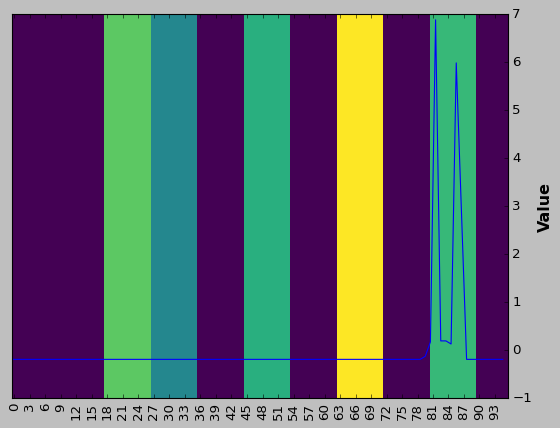

In [16]:
leftist.plot(np.array([explained_instance]), np.array([explanations[0]]))